# 1.0 OVERVIEW

This project consists of four main sections:

1. An Introduction to the real-world dataset and the datasets I will be attempting to synthesise.

2. Explaratory Data Analysis of the realword dataset and commentary on the relationships between the variables and their properties

3. A first simulated dataset created using the Numpy's *".random"* package.

4. A second simulated dataset created using Regression Analysis to model/predict changes to a one variable based on increases to other related varaible.

# 2.0 INTRODUCTION TO THE DATASET

## 2.1 Background on the Real-World Dataset / Phenomenon

The real-world phenomenon I have chosen to base this project around is the number of Livechats the Customer Service Team in my place of work recieves on a weekly basis. 

I work for a company based in Ireland that provides procurement and supplier data management software to various type of organisations around the world. 

The software / application is a web-based platform where "Buyers" of provide and services can interact with "Suppliers" by sending them "Requests" for information about the Supplier's business or for quotes and estimates on the products of services they provide. In order to engage with eachother, both sets of users must register on the system and create an account.

The Customer Service Team provide technical support on how to use the system for both sets of users. The most common channel Users avail of for getting in touch with the Customer Service Team is the application's Livechat function. Each page on our products marketing website and each page in the application itself has a Livechat widget that allows Users to type questions and recieve answers from a member of the Customer Service Team. 

As you will see when we begin to look at the dataset below, we are currently a small enough company with a relatively low volume of Livechats, but they still take up a lot of the Customer Service Team time dealing with them. 

In this project I have attempted to:

1. Identify what variables influence the number of Livechats and to what degree.

2. Create a synthetic "Average Week" of activity on the application and the number of Livechats.

3. Create three simulated datassets that look a the possible increase in the volume of Livechats if the volume of the other varaibles that influence the number of Livechats increased. 

## 2.2 The Real-World Dataset & it's Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ConorHogan/PFDA-Project/master/LivechatDOW.csv"
live_chat = pd.read_csv(url)
live_chat.head()

Day  Hour  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
0    1     0         0               0                      0              0   
1    1     1         0               0                      0             10   
2    1     2         0               0                      0              0   
3    1     3         0               0                      0              0   
4    1     4         1              26                     26             29   

   SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
0                      0                 0                       0   
1                     14                10                      14   
2                      0                 0                       0   
3                      0                 0                       0   
4                     33                55                      59   

   NewUserMail  NonRegMail  
0            4          76  
1            1          48  
2            2           7  
3            0           6  
4            0         194

In [3]:
live_chat.tail()

Day  Hour  Livechat  PublishedCount  SuppliersInvitedCount  \
163    7    19         0               0                      0   
164    7    20         0               0                      0   
165    7    21         0               0                      0   
166    7    22         0               0                      0   
167    7    23         0               0                      0   

     DeadlineCount  SupplierDeadlineCount  CombinedRequests  \
163              0                      0                 0   
164              0                      0                 0   
165              0                      0                 0   
166              0                      0                 0   
167              0                      0                 0   

     CombinedSupplierAction  NewUserMail  NonRegMail  
163                       0            2           4  
164                       0            1           2  
165                       0            0          19  
166                       0            3          18  
167                       0            0          53

In [4]:
lc_summary = live_chat.describe()
lc_summary.drop(["Day", "Hour"], axis=1)

Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
count  168.000000      168.000000             168.000000     168.000000   
mean     9.833333       19.619048              49.744048      20.958333   
std     15.269502       22.063547              81.169668      42.131581   
min      0.000000        0.000000               0.000000       0.000000   
25%      0.000000        1.000000               2.000000       1.000000   
50%      1.000000        9.500000              22.000000       8.000000   
75%     16.000000       35.000000              68.500000      29.000000   
max     59.000000       95.000000             638.000000     480.000000   

       SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
count             168.000000        168.000000              168.000000   
mean               44.791667         40.577381               94.535714   
std                77.591349         54.991507              132.941250   
min                 0.000000          0.000000                0.000000   
25%                 2.000000          3.750000                5.750000   
50%                14.500000         20.000000               40.500000   
75%                59.000000         67.000000              143.000000   
max               533.000000        521.000000              723.000000   

       NewUserMail    NonRegMail  
count   168.000000    168.000000  
mean     21.011905    956.005952  
std      24.878143   1884.525098  
min       0.000000      2.000000  
25%       3.000000     70.250000  
50%       9.000000    205.000000  
75%      37.250000   1463.250000  
max      88.000000  16755.000000

As you can see above the dataset consists of 11 variables with 168 rows data. 

The data is an week broken down hour by hour. Each of the "Days" has been given a number with 1 denoting Sunday and 7 denoting Saturday. The hours per day have been listed ranging from 0 (Midnight-1am) to 23 (11pm-Midnight). 

The other variables are counts of the number of time each "event" happened in the hourly period.

**Important Note:** This dataset was created by combining six months worth of data from the period the 1/May/2018 to 31/October/2018. Therefore the counts under each variable are not a single hours data from a day or week. They are the sum of the counts from six months of data. For example, if you look at the Max value for Livechats, in all likelyhood there was never an hour on a given with 59 livechats.

In [5]:
#locate the max livechat row
live_chat_ind = live_chat.set_index("Day")
livechat_max = live_chat_ind[live_chat_ind['Livechat']==live_chat_ind['Livechat'].max()]
livechat_max

Hour  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
Day                                                                         
5      10        59              50                    374             37   

     SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
Day                                                                    
5                       59                87                     433   

     NewUserMail  NonRegMail  
Day                           
5             72        2330

Later we will be looking at the averages per day over the time period when creating the simulated datasets. 

### 2.2.1 Description of the Variables 

Below is a description of the 9 remaining variables. The main variable we will be focused on the is the number of Livechats per hour. The other 8 variables are various types of activity on the application that could cause a User to initiate a Livechat. Please excuse the longwinded names.

We have users based all over the world, but most users are based in the UK and Ireland. We have other significant groups of users based in the U.A.E, Singapore, and Australia. You will notice that there lulls in the number of livechats and other activity at particular times that line-up with activity in these countries.

#### 2.2.1.1 Livechat

This is the number of livechats initiated per hour. As I have said above, Users can start a Livechat with members of the Customer Service Team using a widget on our Marketing Website or on the application itself. Just because a livechat is iniated by a User does not necessarily mean it will be picked up and answered. In fact our Customer Service hours are 7am - 6pm GMT Monday to Friday. Livechat that are iniated outside of these hours are still tracked, and the User has the option to leave a message that can be picked up later or converted into a ticket. 

#### 2.2.1.2 PublishedCount

This is the number of "Requests" published in each hour. A "Request" is basically a questionnaire sent from a Buyer user to a Supplier user. It could be asking the Supplier for information about their company so they could make a decision on whether to do business with them, or it could be asking for quotes for performing a service / providing a product. 

The length and complexity of a Request can vary greatly and I would assume that this would increase the number of possible livechat as there is a variation in the chance for a supplier to be confused by a question or something to go wrong in the features used when building the request. Unfortunetly this data was not available, so I am forced to just examine the raw number of requests published.

#### 2.2.1.3 SuppliersInvitedCount

Multiple Suppliers can be invited to each request. One would assume that the greater if more Suppliers are invited, there are more users interacting with the application and therefore there is a greater chance of there being a Livechat. 

One thing worth noting is that a Request can be published as an "Open" Request with no Suppliers invited at the time of publication. Suppliers can instead find the Request and join at any point before the deadline. 

#### 2.2.1.4 DeadlineCount

This is the count of the number of Requests coming to an end in each hour. This may influence the number of Livechats as Suppliers scramble to complete and submit close to the deadline.

#### 2.2.1.5 SupplierDeadlineCount

This is the count of the number of Supplier who were invited to or have joined a Request at the time of the deadline. As I stated above, the number of Suppliers associated with a Request can increase at any point up to the the deadline as more join or are invited.

It would have been interesting to look at the number of suppliers who were still working on their response in the hour before the deadline, but unfortunately that data was not available.

#### 2.2.1.6 CombinedRequests

This is the combined count of the number of Request starting and ending in a hourly period. I have included this in some of the initial exploration of the data, but it is dropped later.

#### 2.2.1.7  CombinedSupplierAction

Similar to the above, this is the combined number of Supplier invited to Requests that have just been published along with the number of Suppliers associated with a Request that had a deadline in the hourly period.

#### 2.2.1.8 NewUserMail

This is the count of mails issued to User who have registered on the system in that hour. Both new Buyer users and new Supplier users get a mail asking them to click on a link to verify their account and create a password. It is this specific mail being counted here. Users tend to have more questions when interacting with the system for the first time, which I would assume results in Livechats.

#### 2.2.1.9 NonRegMail

This is the count of all other mails sent in each hour. Mails are mostly commonly notifications from the system reminding users about deadlines, certifications and insurance details that need to be updated, contracts that are expiring, suppliers responses that need to be reviewed. These tend to trigger an action from a User with the system. I would assume that as interation with the system goes up, so does the chance of a Livechat.

# 3.0 EXPLARATORY DATA ANALYSIS

Corrolation readings of above +/- 0.5 indicate strong positive or negative corrolation. 

### Excluding Specific Hours of the Day

#### Corrolation

In [6]:
lc_corr = live_chat.corr()
lc_corr

Day      Hour  Livechat  PublishedCount  \
Day                     1.000000  0.000000 -0.008015       -0.179942   
Hour                    0.000000  1.000000 -0.045864       -0.241421   
Livechat               -0.008015 -0.045864  1.000000        0.782965   
PublishedCount         -0.179942 -0.241421  0.782965        1.000000   
SuppliersInvitedCount  -0.063806 -0.067998  0.666309        0.647514   
DeadlineCount          -0.003259 -0.037636  0.393666        0.409971   
SupplierDeadlineCount   0.022352 -0.008787  0.464363        0.464122   
CombinedRequests       -0.074693 -0.125697  0.615745        0.715316   
CombinedSupplierAction -0.025912 -0.046646  0.677853        0.666237   
NewUserMail            -0.073793 -0.104177  0.932075        0.806586   
NonRegMail              0.014096 -0.023836  0.707275        0.524166   

                        SuppliersInvitedCount  DeadlineCount  \
Day                                 -0.063806      -0.003259   
Hour                                -0.067998      -0.037636   
Livechat                             0.666309       0.393666   
PublishedCount                       0.647514       0.409971   
SuppliersInvitedCount                1.000000       0.331686   
DeadlineCount                        0.331686       1.000000   
SupplierDeadlineCount                0.402064       0.832608   
CombinedRequests                     0.513914       0.930635   
CombinedSupplierAction               0.845233       0.688470   
NewUserMail                          0.685207       0.404578   
NonRegMail                           0.398718       0.248604   

                        SupplierDeadlineCount  CombinedRequests  \
Day                                  0.022352         -0.074693   
Hour                                -0.008787         -0.125697   
Livechat                             0.464363          0.615745   
PublishedCount                       0.464122          0.715316   
SuppliersInvitedCount                0.402064          0.513914   
DeadlineCount                        0.832608          0.930635   
SupplierDeadlineCount                1.000000          0.824114   
CombinedRequests                     0.824114          1.000000   
CombinedSupplierAction               0.829139          0.794775   
NewUserMail                          0.473573          0.633582   
NonRegMail                           0.271595          0.400772   

                        CombinedSupplierAction  NewUserMail  NonRegMail  
Day                                  -0.025912    -0.073793    0.014096  
Hour                                 -0.046646    -0.104177   -0.023836  
Livechat                              0.677853     0.932075    0.707275  
PublishedCount                        0.666237     0.806586    0.524166  
SuppliersInvitedCount                 0.845233     0.685207    0.398718  
DeadlineCount                         0.688470     0.404578    0.248604  
SupplierDeadlineCount                 0.829139     0.473573    0.271595  
CombinedRequests                      0.794775     0.633582    0.400772  
CombinedSupplierAction                1.000000     0.694767    0.401961  
NewUserMail                           0.694767     1.000000    0.694883  
NonRegMail                            0.401961     0.694883    1.000000

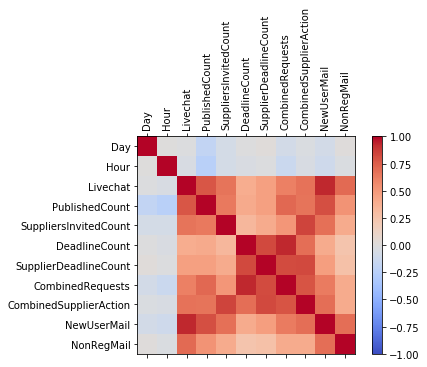

In [7]:
lc_corrfig = pyplt.figure()
ax = lc_corrfig.add_subplot(111)
cax = ax.matshow(lc_corr,cmap='coolwarm', vmin=-1, vmax=1)
lc_corrfig.colorbar(cax)
ticks = np.arange(0,len(live_chat.columns),1)
ax.set_xticks(ticks)
pyplt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(live_chat.columns)
ax.set_yticklabels(live_chat.columns)
pyplt.show()

#### Covariance

In [8]:
live_chat.cov()

Day        Hour      Livechat  PublishedCount  \
Day                      4.023952    0.000000     -0.245509       -7.964072   
Hour                     0.000000   48.203593     -4.862275      -36.982036   
Livechat                -0.245509   -4.862275    233.157685      263.780439   
PublishedCount          -7.964072  -36.982036    263.780439      486.800114   
SuppliersInvitedCount  -10.389222  -38.320359    825.837325     1159.626461   
DeadlineCount           -0.275449  -11.008982    253.256487      381.097804   
SupplierDeadlineCount    3.479042   -4.733533    550.168663      794.548902   
CombinedRequests        -8.239521  -47.991018    517.036926      867.897918   
CombinedSupplierAction  -6.910180  -43.053892   1376.005988     1954.175364   
NewUserMail             -3.682635  -17.994012    354.073852      442.735101   
NonRegMail              53.287425 -311.877246  20352.372255    21794.469347   

                        SuppliersInvitedCount  DeadlineCount  \
Day                                -10.389222      -0.275449   
Hour                               -38.320359     -11.008982   
Livechat                           825.837325     253.256487   
PublishedCount                    1159.626461     381.097804   
SuppliersInvitedCount             6588.514934    1134.300649   
DeadlineCount                     1134.300649    1775.070110   
SupplierDeadlineCount             2532.221806    2721.835579   
CombinedRequests                  2293.927110    2156.167914   
CombinedSupplierAction            9120.736741    3856.136228   
NewUserMail                       1383.673724     424.060379   
NonRegMail                       60990.420694   19738.688872   

                        SupplierDeadlineCount  CombinedRequests  \
Day                                  3.479042         -8.239521   
Hour                                -4.733533        -47.991018   
Livechat                           550.168663        517.036926   
PublishedCount                     794.548902        867.897918   
SuppliersInvitedCount             2532.221806       2293.927110   
DeadlineCount                     2721.835579       2156.167914   
SupplierDeadlineCount             6020.417415       3516.384481   
CombinedRequests                  3516.384481       3024.065833   
CombinedSupplierAction            8552.639222       5810.311591   
NewUserMail                        914.152196        866.795480   
NonRegMail                       39713.414421      41533.158219   

                        CombinedSupplierAction   NewUserMail    NonRegMail  
Day                                  -6.910180     -3.682635  5.328743e+01  
Hour                                -43.053892    -17.994012 -3.118772e+02  
Livechat                           1376.005988    354.073852  2.035237e+04  
PublishedCount                     1954.175364    442.735101  2.179447e+04  
SuppliersInvitedCount              9120.736741   1383.673724  6.099042e+04  
DeadlineCount                      3856.136228    424.060379  1.973869e+04  
SupplierDeadlineCount              8552.639222    914.152196  3.971341e+04  
CombinedRequests                   5810.311591    866.795480  4.153316e+04  
CombinedSupplierAction            17673.375962   2297.825920  1.007038e+05  
NewUserMail                        2297.825920    618.922013  3.257854e+04  
NonRegMail                       100703.835115  32578.538851  3.551435e+06

#### Livechat & PublishedCount

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


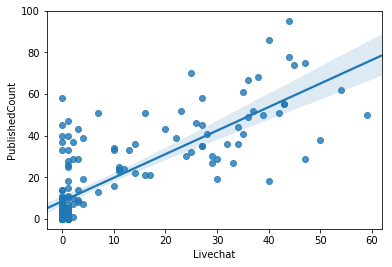

In [9]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["PublishedCount"])

Corrolation is above 0.5 (0.78) indicating a strong corrolation. Simply put, if more requests are published, there are more livechats

#### Livechat & SuppliersInvitedCount

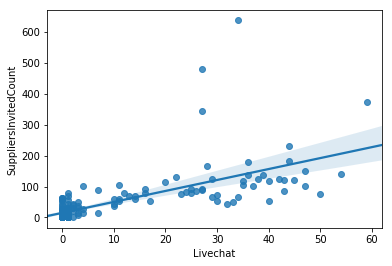

In [10]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["SuppliersInvitedCount"])

Corrolation is aslo high (0.66). Again, shows that as the number of Suppliers invited increases the number of Livechats increases.

#### Livechat & DeadlineCount

There is a weaker corrolation (0.39) between the number of requests coming to an end and the number of livechats.

#### Livechat & SupplierDeadlineCount

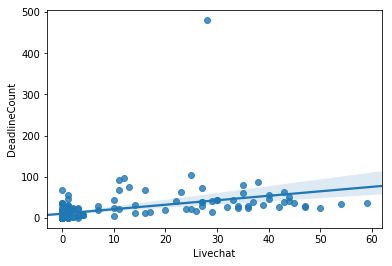

In [11]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["DeadlineCount"])

Again, while these two are positively corrolated (0.46), the corrolation is weaker than for the number of suppliers invited to newly published requests.

#### Livechat & Combined Requests / Combined Supplier Action

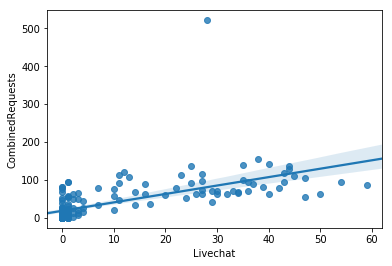

In [12]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["CombinedRequests"])

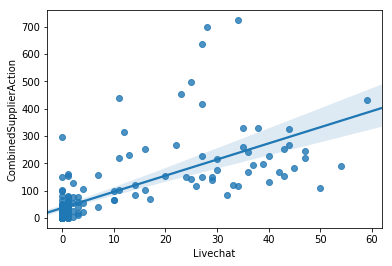

In [13]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["CombinedSupplierAction"])

Looking at both newly published requests and requests ending, along with the number of suppliers invited to those requests shows a stong corrolation in both counts. Both show a corrolation coefficient of 0.61 and 0.67 respectively.

#### Livechat & NewUserMail

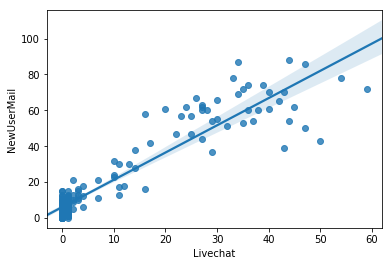

In [14]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["NewUserMail"])

The strongest relationship to the number of Livechats of all is the number of new users registering on the system (0.93).

#### Livechat & NonRegMail

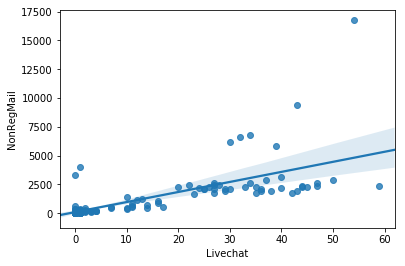

In [15]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["NonRegMail"])

Remember that NonRegMail is all emails sent from the systems to both Supplier Users and Buyer Users excluding emails issued when a new user creates an account. Correlation here is also high at 0.71

#### Observations

Many of the variables contain significant outliers that may have to be removed to gain a more acurate picture. However, in reality there tend to be a few massive events outside the norm once per month or once every second month when a particularly large request is published with a high volume of suppliers invited. The exceptions are Livechat & Published count and Livechat & NewUserMail which have an even spread.

### Multivariate Analysis

###  Relationship between day of the month and number of livechats

#### Summary by Day - SUM

In [16]:
DOW_groupby = live_chat.groupby("Day").sum()
DOW_groupby

Hour  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
Day                                                                         
1     276         9             258                    272            224   
2     276       318             601                   1279            483   
3     276       334             719                   2203            621   
4     276       334             753                   1877            620   
5     276       361             569                   1626            959   
6     276       293             392                   1084            588   
7     276         3               4                     16             26   

     SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
Day                                                                    
1                      270               482                     542   
2                     1254              1084                    2533   
3                     1337              1340                    3540   
4                     1367              1373                    3244   
5                     1385              1528                    3011   
6                     1885               980                    2969   
7                       27                30                      43   

     NewUserMail  NonRegMail  
Day                           
1            102        6281  
2            714       24465  
3            736       30777  
4            754       27292  
5            639       40318  
6            539       27297  
7             46        4179

Text(0,0.5,'Sum of Chats')

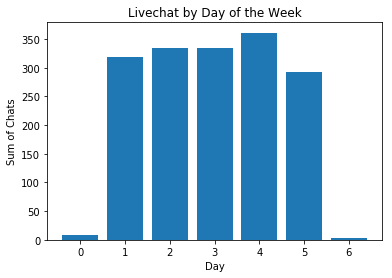

In [17]:
day_series = DOW_groupby.index.values
livechat_by_DOW = DOW_groupby["Livechat"].values
y_pos = np.arange(len(day_series))

pyplt.bar(y_pos, livechat_by_DOW)
pyplt.title("Livechat by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Chats")

##### Distplot of Sum of Day of the Month

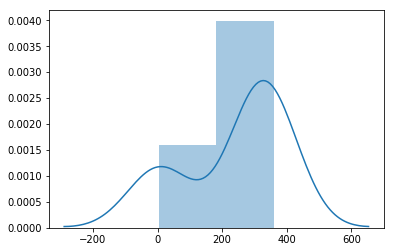

In [18]:
sns.distplot(livechat_by_DOW)

Because the information in the dataset is already a combination of data for a 6 month period we do not learn much from looking at this. Numbers could be influenced by the number of weekends / weekdays that fell on particular days of the month.

For comparison we could also look at the sum some other variables per day.

Text(0,0.5,'Sum of Invited')

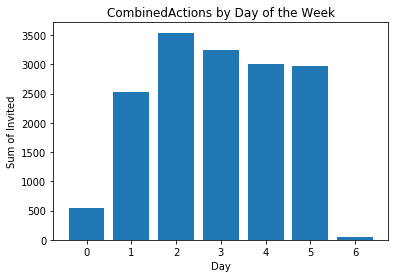

In [19]:
combinv_by_DOW = DOW_groupby["CombinedSupplierAction"].values

pyplt.bar(y_pos, combinv_by_DOW)
pyplt.title("CombinedActions by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Invited")

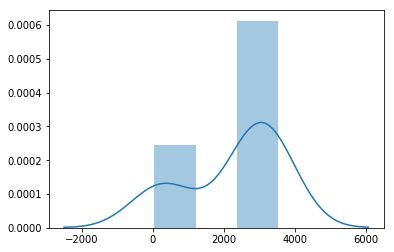

In [20]:
sns.distplot(combinv_by_DOW)

Text(0,0.5,'Sum of Requests')

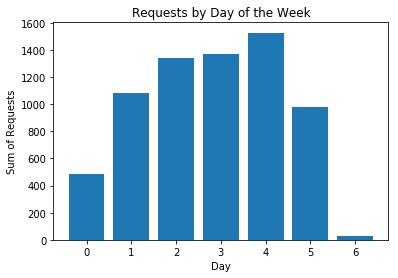

In [21]:
combreq_by_DOW = DOW_groupby["CombinedRequests"].values

pyplt.bar(y_pos, combreq_by_DOW)
pyplt.title("Requests by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Requests")

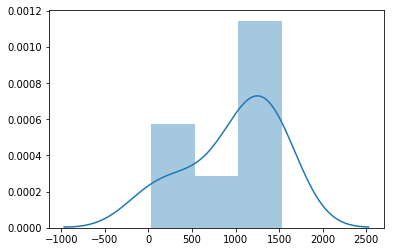

In [22]:
sns.distplot(combreq_by_DOW)

Text(0,0.5,'Sum of New User Mails')

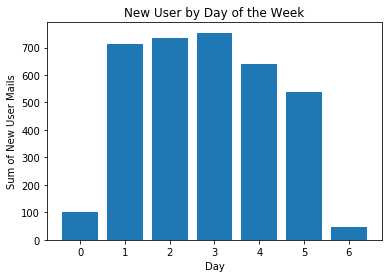

In [23]:
newuser_by_DOW = DOW_groupby["NewUserMail"].values

pyplt.bar(y_pos, newuser_by_DOW)
pyplt.title("New User by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of New User Mails")

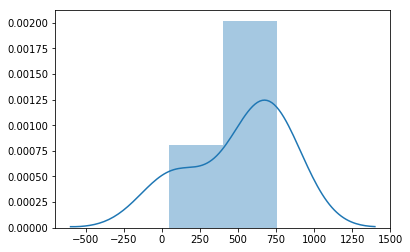

In [24]:
sns.distplot(newuser_by_DOW)

Text(0,0.5,'Sum of Other Mails')

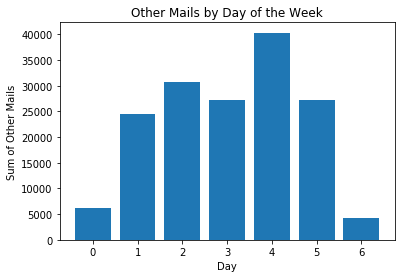

In [25]:
nonregmail_by_DOW = DOW_groupby["NonRegMail"].values

pyplt.bar(y_pos, nonregmail_by_DOW)
pyplt.title("Other Mails by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Other Mails")


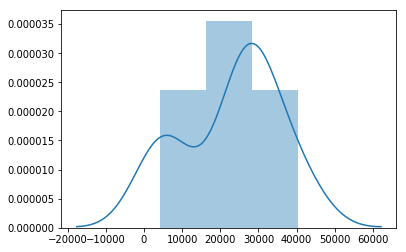

In [26]:
sns.distplot(nonregmail_by_DOW)

### Summary by Hour of the Day

In [27]:
HOD_groupby = live_chat.groupby("Hour").sum()
HOD_groupby

Day  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
Hour                                                                        
0      28         3              18                     31             33   
1      28         6              40                    155             64   
2      28         7              58                    126             13   
3      28        13             110                    249             33   
4      28         3             199                    321            271   
5      28         9             179                    227            114   
6      28        49             202                    282            173   
7      28        68             148                    338             69   
8      28       159             317                    683            128   
9      28       223             428                    804            220   
10     28       233             296                    830            214   
11     28       164             276                    514            414   
12     28       179             211                    403            178   
13     28       152             188                    562            734   
14     28       160             176                   1032            101   
15     28       140             187                   1058            190   
16     28        63             126                    399            399   
17     28         6              35                     91             85   
18     28         1              19                     62             22   
19     28         2              22                     51              7   
20     28         4              23                     54              2   
21     28         3              10                     28             15   
22     28         1              11                     34             30   
23     28         4              17                     23             12   

      SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
Hour                                                                    
0                        76                51                     107   
1                        78               104                     233   
2                        33                71                     159   
3                        56               143                     305   
4                       601               470                     922   
5                       138               293                     365   
6                       267               375                     549   
7                       111               217                     449   
8                       236               445                     919   
9                       476               648                    1280   
10                      337               510                    1167   
11                     1378               690                    1892   
12                      351               389                     754   
13                     1069               922                    1631   
14                      327               277                    1359   
15                      499               377                    1557   
16                     1055               525                    1454   
17                      239               120                     330   
18                       40                41                     102   
19                       11                29                      62   
20                        5                25                      59   
21                       20                25                      48   
22                      108                41                     142   
23                       14                29                      37   

      NewUserMail  NonRegMail  
Hour                           
0              58         644  
1       

Text(0,0.5,'Sum of Chats')

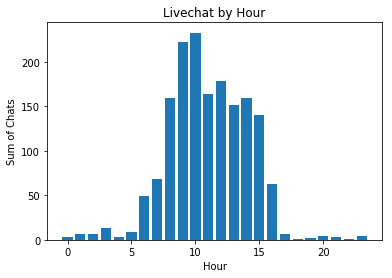

In [28]:
hour_series = HOD_groupby.index.values
livechat_by_HOD = HOD_groupby["Livechat"].values
y_posH = np.arange(len(hour_series))

pyplt.bar(y_posH, livechat_by_HOD)
pyplt.title("Livechat by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Chats")

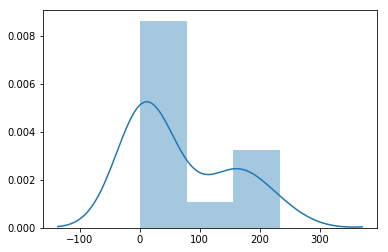

In [29]:
sns.distplot(livechat_by_HOD)

Text(0,0.5,'Sum of Requests')

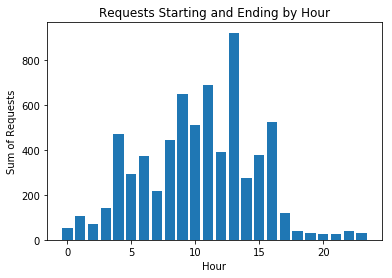

In [30]:
requests_by_HOD = HOD_groupby["CombinedRequests"].values

pyplt.bar(y_posH, requests_by_HOD)
pyplt.title("Requests Starting and Ending by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Requests")

Text(0,0.5,'Sum of Invited')

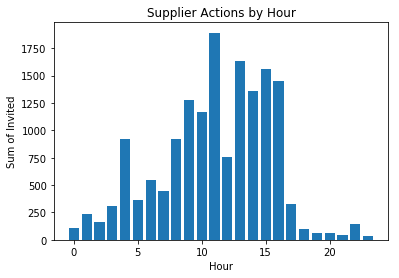

In [31]:
actions_by_HOD = HOD_groupby["CombinedSupplierAction"].values

pyplt.bar(y_posH, actions_by_HOD)
pyplt.title("Supplier Actions by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Invited")

Text(0,0.5,'Sum of Mails')

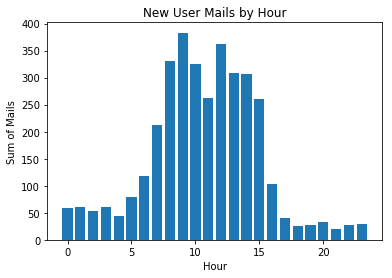

In [32]:
newusermail_by_HOD = HOD_groupby["NewUserMail"].values

pyplt.bar(y_posH, newusermail_by_HOD)
pyplt.title("New User Mails by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Mails")

Text(0,0.5,'Sum of Mails')

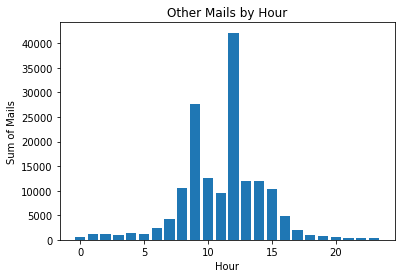

In [33]:
nonregmail_by_HOD = HOD_groupby["NonRegMail"].values

pyplt.bar(y_posH, nonregmail_by_HOD)
pyplt.title("Other Mails by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Mails")

### Summary Hour by Hour and Day by Day 

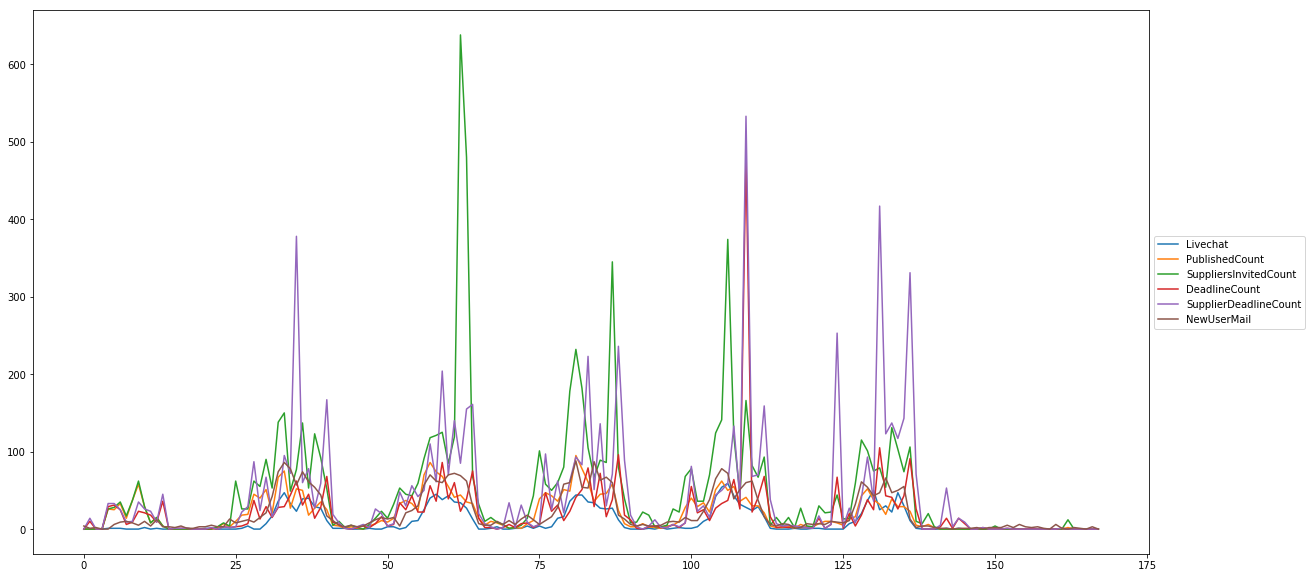

In [34]:
ax = live_chat[["Livechat","PublishedCount","SuppliersInvitedCount","DeadlineCount","SupplierDeadlineCount","NewUserMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

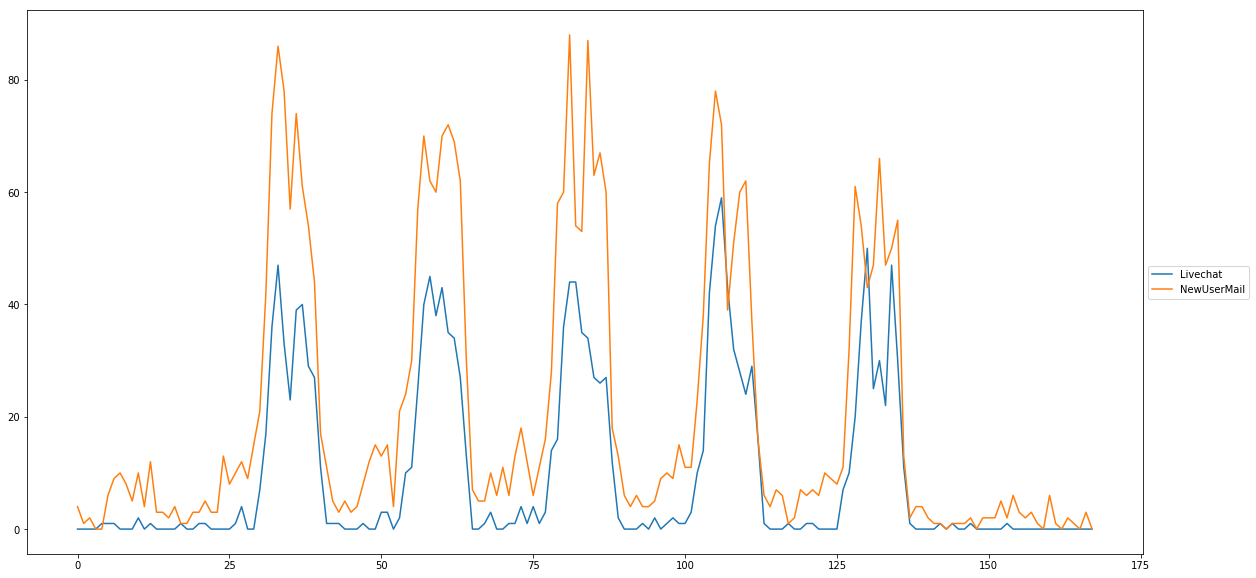

In [35]:
ax = live_chat[["Livechat","NewUserMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Looks like Livechats happen at the same hour or in the hour after the registration email is sent.

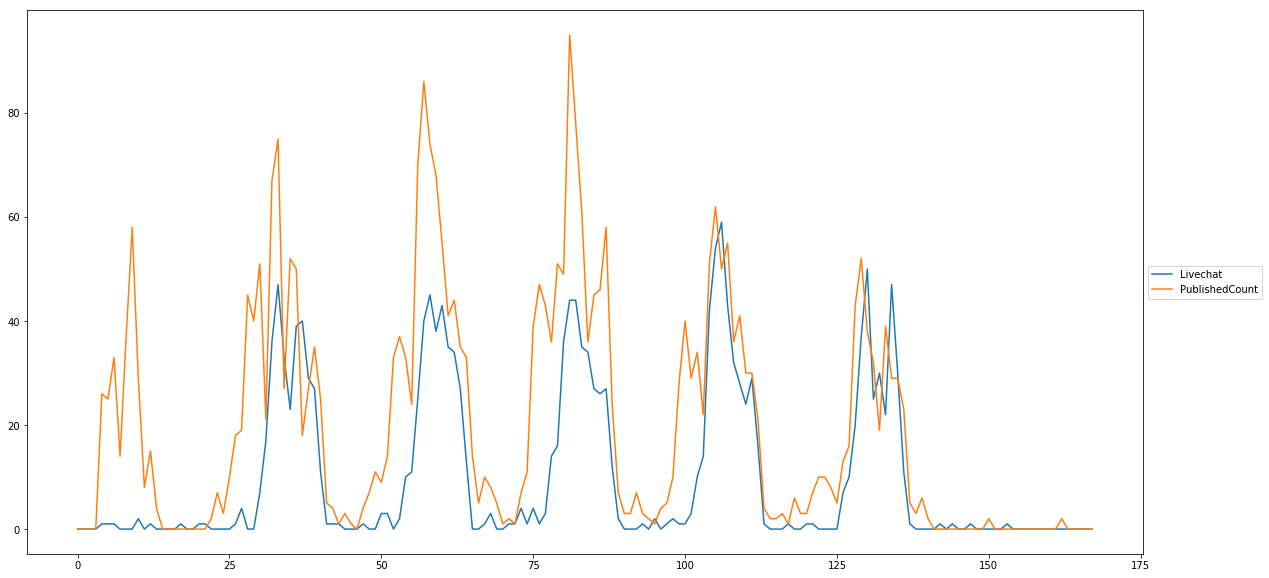

In [36]:
ax = live_chat[["Livechat","PublishedCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

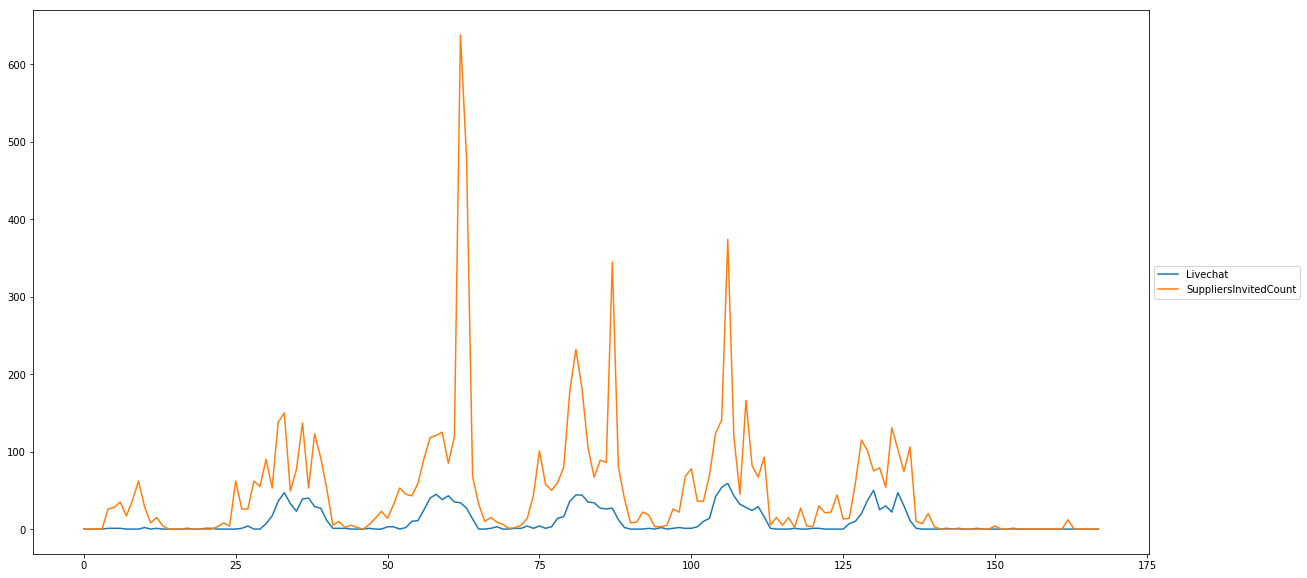

In [37]:
ax = live_chat[["Livechat","SuppliersInvitedCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Massive spike on Tuesdays is not entirely unexcpected. We often encourage customers to publish reqeusts where they are onboarding their supply chains on Tuesdays. 

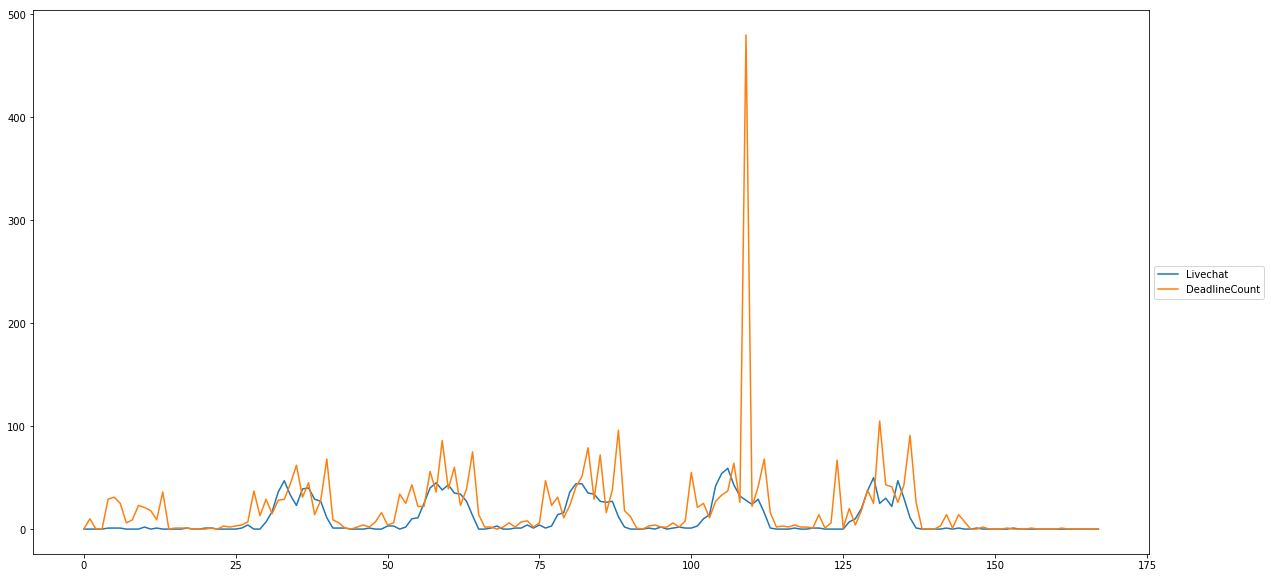

In [38]:
ax = live_chat[["Livechat","DeadlineCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Massive spike on Thursdays is also to be expected. We have Middle East based customer who is responsible for publishing large amounts of requests as part of their supplier registration process. Each supplier might recieve 4 different requests from this one customer. These tend to close on a Thursday as the weekend in the Middle East is Friday and Saturday. However, it is interesting to note that this does not result in a large upswing in Livechats. Presumably, the suppliers have done what they need to do a this stage.

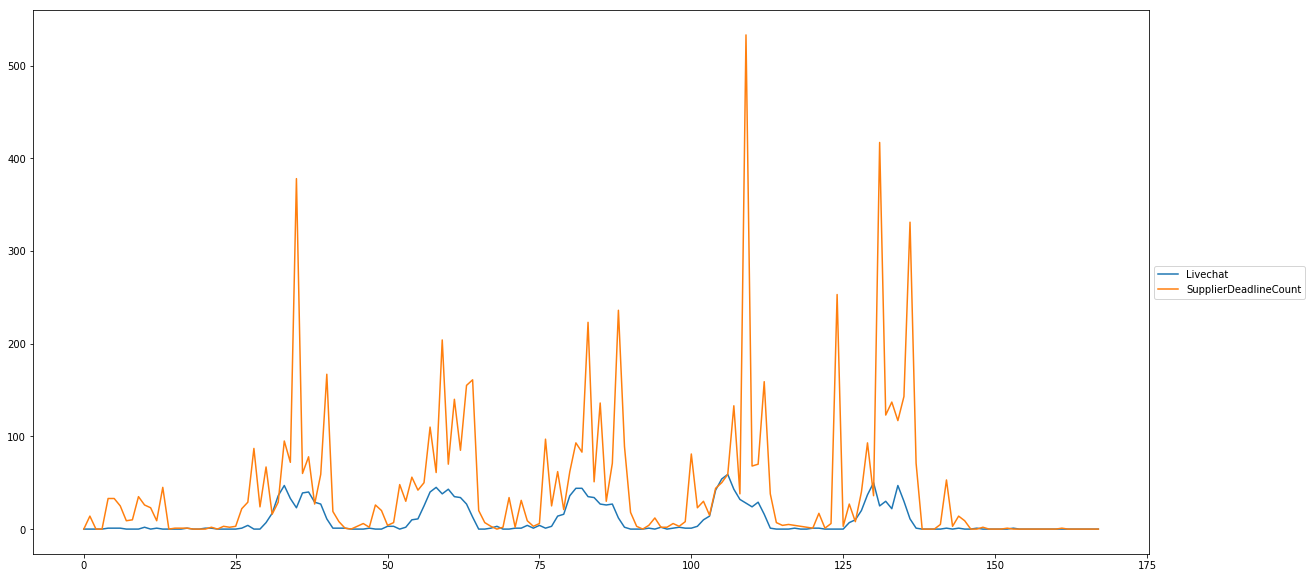

In [39]:
ax = live_chat[["Livechat","SupplierDeadlineCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

This shows something I would not have expected; large requests finishing on Monday lunchtime. This might be due to short-term deadline extensions when client users pick-up messages from Suppliers after a Friday deadline has passed.

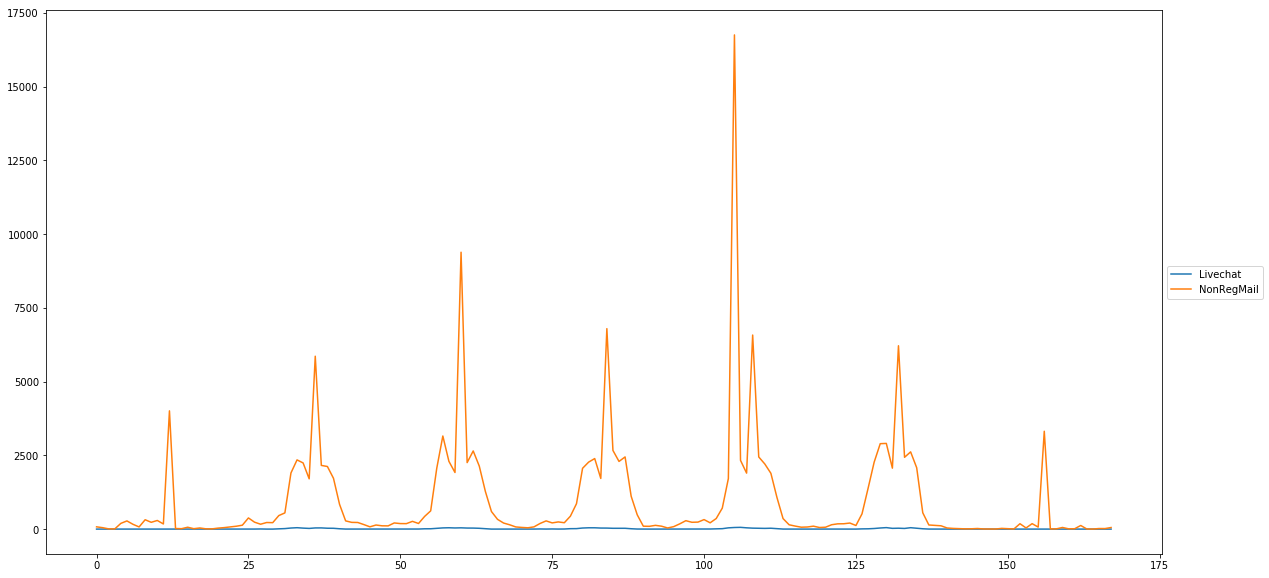

In [40]:
ax = live_chat[["Livechat","NonRegMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Looking at Individual Days

Because there is such a large difference in the amount of livechats per hour in different days we will need to evaluate each day individually and then synthesise the new dataset based on this.

From here on we are going to lose the two combined columns (CombinedRequests & CombinedSupplierAction).

In [41]:
live_chat_2 = live_chat.drop(["CombinedRequests", "CombinedSupplierAction"], axis=1)
live_chat_2.head()

Day  Hour  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
0    1     0         0               0                      0              0   
1    1     1         0               0                      0             10   
2    1     2         0               0                      0              0   
3    1     3         0               0                      0              0   
4    1     4         1              26                     26             29   

   SupplierDeadlineCount  NewUserMail  NonRegMail  
0                      0            4          76  
1                     14            1          48  
2                      0            2           7  
3                      0            0           6  
4                     33            0         194

In [42]:
Sunday = live_chat_2.loc[live_chat_2["Day"]==1]
Monday = live_chat_2.loc[live_chat_2["Day"]==2]
Tuesday = live_chat_2.loc[live_chat_2["Day"]==3]
Wednesday = live_chat_2.loc[live_chat_2["Day"]==4]
Thursday = live_chat_2.loc[live_chat_2["Day"]==5]
Friday = live_chat_2.loc[live_chat_2["Day"]==6]
Saturday = live_chat_2.loc[live_chat_2["Day"]==7]

In order to feed an average for a single day into our distribution function we need to divide each number in the the above dataframes by the number of times that day of the week occured in the time period. As I mentioned above, the original dataset consists of totals for the 1st of May 2018 to the 31st of October 2018. There are:
* Mondays = 26
* Tuesdays = 27
* Wednesdays = 27
* Thursdays = 26
* Fridays = 26
* Saturdays = 26
* Sundays = 26

Therefore we need to create the below dataframes:

In [43]:
Sun_D = Sunday.divide(26).drop(["Day","Hour"],axis=1)
Mon_D = Monday.divide(27).drop(["Day","Hour"],axis=1)
Tues_D = Tuesday.divide(27).drop(["Day","Hour"],axis=1)
Wed_D = Wednesday.divide(26).drop(["Day","Hour"],axis=1)
Thurs_D = Thursday.divide(26).drop(["Day","Hour"],axis=1)
Fri_D = Friday.divide(26).drop(["Day","Hour"],axis=1)
Sat_D = Saturday.divide(26).drop(["Day","Hour"],axis=1)


Day and Hour were dropped from the above to prevent them being divided into nonsense numbers and being passed through the *np.random.poisson* function.

Apply Poisson distribution to all dataframes using *applymap* feature.

In [44]:
Sun_D = Sun_D.applymap(np.random.poisson)
Mon_D = Mon_D.applymap(np.random.poisson)
Tues_D = Tues_D.applymap(np.random.poisson)
Wed_D = Wed_D.applymap(np.random.poisson)
Thurs_D = Thurs_D.applymap(np.random.poisson)
Fri_D = Fri_D.applymap(np.random.poisson)
Sat_D = Sat_D.applymap(np.random.poisson)


In [45]:
Sat_D.tail()

Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
163         0               0                      0              0   
164         0               0                      0              0   
165         0               0                      0              0   
166         0               0                      0              0   
167         0               0                      0              0   

     SupplierDeadlineCount  NewUserMail  NonRegMail  
163                      0            0           1  
164                      0            0           0  
165                      0            0           0  
166                      0            0           1  
167                      0            0           1

Adding back in the hours and day.


In [46]:
Sun_D["Day"] = Sunday["Day"]
Sun_D["Hour"] = Sunday["Hour"]
Mon_D["Day"] = Monday["Day"]
Mon_D["Hour"] = Monday["Hour"]
Tues_D["Day"] = Tuesday["Day"]
Tues_D["Hour"] = Tuesday["Hour"]
Wed_D["Day"] = Wednesday["Day"]
Wed_D["Hour"] = Wednesday["Hour"]
Thurs_D["Day"] = Thursday["Day"]
Thurs_D["Hour"] = Thursday["Hour"]
Fri_D["Day"] = Friday["Day"]
Fri_D["Hour"] = Friday["Hour"]
Sat_D["Day"] = Saturday["Day"]
Sat_D["Hour"] = Saturday["Hour"]

Reorder the columns

In [47]:
Sun_D.columns.values

array(['Livechat', 'PublishedCount', 'SuppliersInvitedCount',
       'DeadlineCount', 'SupplierDeadlineCount', 'NewUserMail',
       'NonRegMail', 'Day', 'Hour'], dtype=object)

In [48]:
Sun_D = Sun_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Mon_D = Mon_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Tues_D = Tues_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount","SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Wed_D = Wed_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Thurs_D = Thurs_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Fri_D = Fri_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Sat_D = Sat_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]


Merge the frames back together again. 

In [49]:
day_frames = [Sun_D, Mon_D, Tues_D, Wed_D, Thurs_D, Fri_D, Sat_D]

In [50]:
mocked_up_week = pd.concat(day_frames)
mocked_up_week

Day  Hour  Livechat  PublishedCount  SuppliersInvitedCount  \
0      1     0         0               0                      0   
1      1     1         0               0                      0   
2      1     2         0               0                      0   
3      1     3         0               0                      0   
4      1     4         0               1                      0   
5      1     5         0               2                      0   
6      1     6         0               2                      2   
7      1     7         0               0                      1   
8      1     8         0               1                      1   
9      1     9         0               2                      1   
10     1    10         0               3                      1   
11     1    11         0               0                      0   
12     1    12         0               0                      1   
13     1    13         0               1                      0   
14     1    14         0               0                      0   
15     1    15         0               0                      0   
16     1    16         0               0                      0   
17     1    17         0               0                      0   
18     1    18         0               0                      0   
19     1    19         0               0                      0   
20     1    20         0               0                      0   
21     1    21         0               0                      0   
22     1    22         0               0                      0   
23     1    23         0               0                      1   
24     2     0         0               0                      0   
25     2     1         0               1                      3   
26     2     2         1               1                      1   
27     2     3         0               0                      1   
28     2     4         0               2                      2   
29     2     5         0               3                      2   
..   ...   ...       ...             ...                    ...   
138    6    18         0               0                      0   
139    6    19         0               0                      3   
140    6    20         0               0                      0   
141    6    21         0               0                      0   
142    6    22         0               0                      0   
143    6    23         0               0                      0   
144    7     0         0               0                      0   
145    7     1         0               0                      0   
146    7     2         0               0                      0   
147    7     3         0               0                      0   
148    7     4         0               0                      0   
149    7     5         0               0                      0   
150    7     6         0               0                      0   
151    7     7         0               0                      0   
152    7     8         0               0                      0   
153    7     9         0               0                      0   
154    7    10         0               0                      0   
155    7    11         0               0                      0   
156    7    12         0               0                      0   
157    7    13         0               0                      0   
158    7    14         0               0                      0   
159    7    15         0               0                      0   
160    7    16         0               0                      0   
161    7    17         0               0                      0   
162    7    18         0               0                      0   
163    7    19         0               0                      0   
164    7    20         0               0                      0   
165    7    21         0               0            

Remember that the below figures are for a week's worth of data rather than the 6 months worth of data in the original "live_chat" dataset.

In [51]:
mocked_up_week.drop(["Day","Hour"], axis=1).describe()

Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
count  168.000000      168.000000             168.000000     168.000000   
mean     0.321429        0.779762               1.851190       0.803571   
std      0.806571        1.170627               3.184242       2.074247   
min      0.000000        0.000000               0.000000       0.000000   
25%      0.000000        0.000000               0.000000       0.000000   
50%      0.000000        0.000000               1.000000       0.000000   
75%      0.000000        1.000000               3.000000       1.000000   
max      5.000000        5.000000              23.000000      23.000000   

       SupplierDeadlineCount  NewUserMail  NonRegMail  
count             168.000000   168.000000  168.000000  
mean                1.803571     0.696429   37.196429  
std                 3.246848     1.187555   73.024584  
min                 0.000000     0.000000    0.000000  
25%                 0.000000     0.000000    2.000000  
50%                 0.000000     0.000000    8.000000  
75%                 2.000000     1.000000   55.500000  
max                19.000000     8.000000  631.000000

In [52]:
mocked_up_week.drop(["Day","Hour"], axis=1).corr()

Livechat  PublishedCount  SuppliersInvitedCount  \
Livechat               1.000000        0.398863               0.461720   
PublishedCount         0.398863        1.000000               0.440953   
SuppliersInvitedCount  0.461720        0.440953               1.000000   
DeadlineCount          0.152498        0.199091               0.334617   
SupplierDeadlineCount  0.223183        0.317818               0.335398   
NewUserMail            0.258769        0.373741               0.341107   
NonRegMail             0.421340        0.486082               0.344660   

                       DeadlineCount  SupplierDeadlineCount  NewUserMail  \
Livechat                    0.152498               0.223183     0.258769   
PublishedCount              0.199091               0.317818     0.373741   
SuppliersInvitedCount       0.334617               0.335398     0.341107   
DeadlineCount               1.000000               0.673525     0.136088   
SupplierDeadlineCount       0.673525               1.000000     0.307464   
NewUserMail                 0.136088               0.307464     1.000000   
NonRegMail                  0.134192               0.222511     0.411191   

                       NonRegMail  
Livechat                 0.421340  
PublishedCount           0.486082  
SuppliersInvitedCount    0.344660  
DeadlineCount            0.134192  
SupplierDeadlineCount    0.222511  
NewUserMail              0.411191  
NonRegMail               1.000000

In [53]:
live_chat.drop(["Day","Hour","CombinedRequests","CombinedSupplierAction"], axis=1).corr()

Livechat  PublishedCount  SuppliersInvitedCount  \
Livechat               1.000000        0.782965               0.666309   
PublishedCount         0.782965        1.000000               0.647514   
SuppliersInvitedCount  0.666309        0.647514               1.000000   
DeadlineCount          0.393666        0.409971               0.331686   
SupplierDeadlineCount  0.464363        0.464122               0.402064   
NewUserMail            0.932075        0.806586               0.685207   
NonRegMail             0.707275        0.524166               0.398718   

                       DeadlineCount  SupplierDeadlineCount  NewUserMail  \
Livechat                    0.393666               0.464363     0.932075   
PublishedCount              0.409971               0.464122     0.806586   
SuppliersInvitedCount       0.331686               0.402064     0.685207   
DeadlineCount               1.000000               0.832608     0.404578   
SupplierDeadlineCount       0.832608               1.000000     0.473573   
NewUserMail                 0.404578               0.473573     1.000000   
NonRegMail                  0.248604               0.271595     0.694883   

                       NonRegMail  
Livechat                 0.707275  
PublishedCount           0.524166  
SuppliersInvitedCount    0.398718  
DeadlineCount            0.248604  
SupplierDeadlineCount    0.271595  
NewUserMail              0.694883  
NonRegMail               1.000000

While there is still a positive corrolation between the number of chats and the other variables it is not as strong as it was in our original "live_chat" dataset covering a 6 month period vs this one synthesized week.

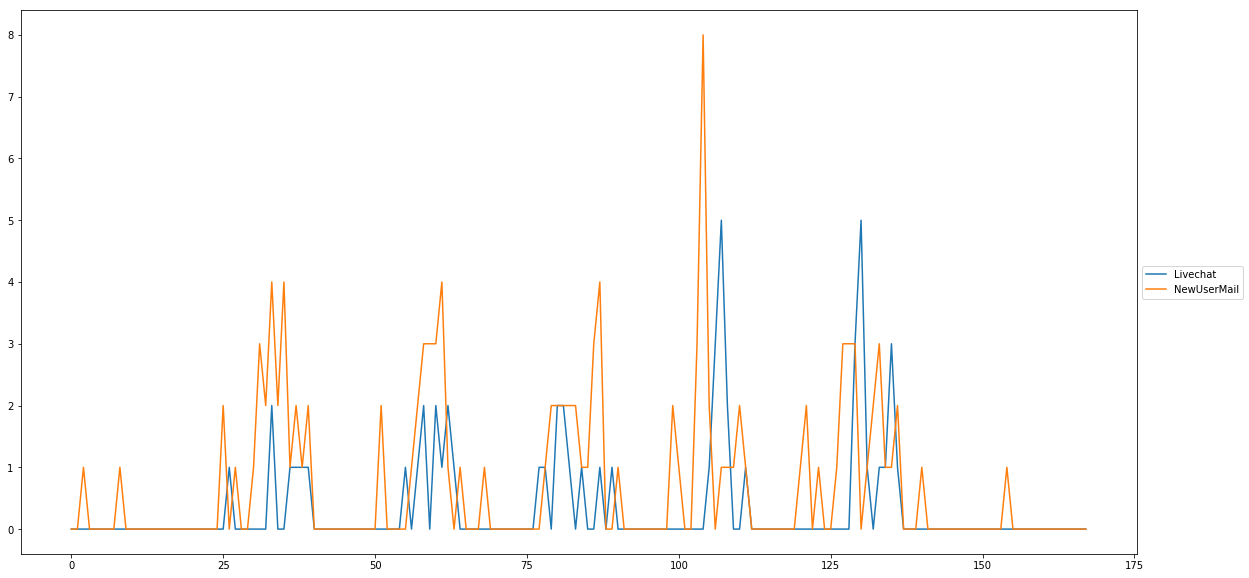

In [54]:
ax = mocked_up_week[["Livechat","NewUserMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Relationships and modelling

In this section we will create a second mock dataset that predicts the count of Livechats if activity increased significatly. What would an average week look like if activity increased by a factor of 5, 10, 20.

In order to do this we will use Linear Regression to look at the influence of 4 of the variables on the number of Livechats by using the original "live_chat" dataset to get the regression coefficients and train our models.

We will then apply this model to each day individually, in the three increased activity scenarios. I'm aware that each of the four variables we are looking at are also interacting with eachother can could have some degree of collinearity, but this could at least give us some rough estimates of what an average week could like for each increase scenerio.

#### Training the Regression model

In [55]:
Sun_Dalt = Sunday.divide(26).drop(["Day","Hour"],axis=1)
Mon_Dalt = Monday.divide(27).drop(["Day","Hour"],axis=1)
Tues_Dalt = Tuesday.divide(27).drop(["Day","Hour"],axis=1)
Wed_Dalt = Wednesday.divide(26).drop(["Day","Hour"],axis=1)
Thurs_Dalt = Thursday.divide(26).drop(["Day","Hour"],axis=1)
Fri_Dalt = Friday.divide(26).drop(["Day","Hour"],axis=1)
Sat_Dalt = Saturday.divide(26).drop(["Day","Hour"],axis=1)

In [56]:
from sklearn import linear_model

We will base our predictions on the four variables that are most highly corrolated with the number of Livechats. These were:
1. NewUserMail with a corrolation coefficient of 0.93
2. PublishedCount with a corrolation coefficent of 0.78
3. NonRegMail with a corrolation coefficient of 0.71
4. SuppliersInvited with a corrolation coefficient of 0.66

Below I have tested / trained the data using three different Linear regression models. Scikit-Learn has a cheatsheet page for helping to select the correct Regression model here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.

This data seemed to most closely match the Lasso and ElasticNet models, but I have also included Ordinary Least Squares Regression below.

In [57]:
regLass = linear_model.Lasso()
regLass.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
regLass.coef_

array([0.44693093, 0.05876259, 0.00108157, 0.01097613])

In [59]:
regElas = linear_model.ElasticNet()
regElas.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
regElas.coef_

array([0.44687093, 0.06044885, 0.00107435, 0.0108343 ])

In [61]:
regLin = linear_model.LinearRegression()
regLin.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
regLin.coef_

array([0.4500989 , 0.06065626, 0.00105072, 0.01041581])

It's worth noting the Regression Coefficients above. None are showing as great predictors of what the Livechat value will be, but they are the only values we have to work with. As expected from looking at the corrolation coefficients above, the lmplots, and the line plot comparisons, NewUserMail is the best predictor of the Livechat count, but the other variables are all suprisingly low. 

This count be due not having performed normalization or standardisation on the dataset. For example, NewUserMails and Livechats both correspond to a single person, whereas each request is published to multiple people in most a lot of cases.

##### Normalising attempt

In [63]:
from sklearn import preprocessing
norm_data = preprocessing.normalize(live_chat.drop(["Day","Hour"],axis=1))
norm_df = pd.DataFrame(data=norm_data, columns=["Livechat","PublishedRequest","InvitedSuppliers","DeadlineRequests","DeadlineSuppliers","CombinedRequests","CombinedSupplierActions","NewUserMail","NonRegMails"] )

In [64]:
norm_df.head()

Livechat  PublishedRequest  InvitedSuppliers  DeadlineRequests  \
0  0.000000           0.00000           0.00000          0.000000   
1  0.000000           0.00000           0.00000          0.185791   
2  0.000000           0.00000           0.00000          0.000000   
3  0.000000           0.00000           0.00000          0.000000   
4  0.004592           0.11939           0.11939          0.133166   

   DeadlineSuppliers  CombinedRequests  CombinedSupplierActions  NewUserMail  \
0           0.000000          0.000000                 0.000000     0.052559   
1           0.260108          0.185791                 0.260108     0.018579   
2           0.000000          0.000000                 0.000000     0.274721   
3           0.000000          0.000000                 0.000000     0.000000   
4           0.151534          0.252557                 0.270925     0.000000   

   NonRegMails  
0     0.998618  
1     0.891799  
2     0.961524  
3     1.000000  
4     0.890837

In [65]:
regLassNorm = linear_model.Lasso()
regLassNorm.fit(norm_df[["NewUserMail","PublishedRequest","NonRegMails","InvitedSuppliers"]],norm_df.Livechat)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
regLassNorm.coef_

array([ 0., -0., -0., -0.])

Well that was a waste of time

#### Creating Three Scenario Datasets

In [67]:
live_chat.head()

Day  Hour  Livechat  PublishedCount  SuppliersInvitedCount  DeadlineCount  \
0    1     0         0               0                      0              0   
1    1     1         0               0                      0             10   
2    1     2         0               0                      0              0   
3    1     3         0               0                      0              0   
4    1     4         1              26                     26             29   

   SupplierDeadlineCount  CombinedRequests  CombinedSupplierAction  \
0                      0                 0                       0   
1                     14                10                      14   
2                      0                 0                       0   
3                      0                 0                       0   
4                     33                55                      59   

   NewUserMail  NonRegMail  
0            4          76  
1            1          48  
2            2           7  
3            0           6  
4            0         194

In [68]:
live_chat_by5 = live_chat.multiply(5).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)
live_chat_by10 = live_chat.multiply(10).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)
live_chat_by20 = live_chat.multiply(20).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)

In [69]:
live_chat_by5.head()

PublishedCount  SuppliersInvitedCount  NewUserMail  NonRegMail
0               0                      0           20         380
1               0                      0            5         240
2               0                      0           10          35
3               0                      0            0          30
4             130                    130            0         970

I'm aware there are a lot of 0 values in the results. Most of these are at times at the early morning, night or weekend where activity is likely not to increase a significant degree anyway and in any case we don't provide livechat cover at these times, so it is safe enough to ignore them.

The columns in the above datasets don't match our regression model so they need to be reordered.

In [70]:
live_chat_by5 = live_chat_by5[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
live_chat_by10 = live_chat_by10[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
live_chat_by20 = live_chat_by20[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]

In [71]:
live_chat_by5.head()

NewUserMail  PublishedCount  NonRegMail  SuppliersInvitedCount
0           20               0         380                      0
1            5               0         240                      0
2           10               0          35                      0
3            0               0          30                      0
4            0             130         970                    130

In [72]:
regLass.predict([[20,0,380,0]])

array([7.05922505])

In [73]:
regLass.predict([[0,130,970,130]])

array([7.8247692])

#### Creating Predicted Livechat column

In [74]:
x = live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
y = live_chat["Livechat"]

model = linear_model.Lasso()

model.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
Livechat5 = model.predict(live_chat_by5)
Livechat10 = model.predict(live_chat_by10)
Livechat20 = model.predict(live_chat_by20)

In [76]:
Livechat5_R = np.around(Livechat5).astype(int).clip(min=0)
Livechat10_R = np.around(Livechat10).astype(int).clip(min=0)
Livechat20_R = np.around(Livechat20).astype(int).clip(min=0)

In [77]:
Livechat10_R

array([ 16,   3,   7,   0,  18,  45,  63,  53,  63,  63,  66,  23, 105,
        14,  11,   7,  16,   3,   2,  11,  11,  21,  13,  17,  59,  50,
        58,  67,  74,  97, 136, 210, 404, 468, 392, 310, 436, 310, 291,
       244, 103,  53,  26,  14,  24,  13,  17,  38,  58,  76,  65,  78,
        44, 120, 134, 159, 326, 408, 356, 340, 454, 381, 431, 371, 172,
        47,  28,  30,  50,  29,  48,  26,  58,  86,  66,  61,  83, 102,
       155, 305, 336, 497, 331, 301, 489, 344, 358, 364, 113,  69,  28,
        19,  32,  20,  18,  22,  43,  51,  49,  91,  82,  70, 128, 196,
       350, 579, 415, 238, 323, 335, 325, 209, 103,  31,  20,  32,  29,
         4,  14,  32,  27,  38,  35,  53,  50,  39,  62, 172, 333, 312,
       252, 258, 377, 271, 278, 291,  87,  12,  19,  23,   9,   2,   2,
         0,   2,   2,   2,   7,   0,   7,   8,   7,  22,   7,  27,  12,
        43,  11,   2,   0,  25,   2,   2,   7,   2,   0,  11,   0])

#### Adding columns to datasets

In [78]:
live_chat_by5["Livechat"] = Livechat5_R
live_chat_by10["Livechat"] = Livechat10_R
live_chat_by20["Livechat"] = Livechat20_R

In [79]:
live_chat_by5.head()

NewUserMail  PublishedCount  NonRegMail  SuppliersInvitedCount  Livechat
0           20               0         380                      0         7
1            5               0         240                      0         0
2           10               0          35                      0         2
3            0               0          30                      0         0
4            0             130         970                    130         8

Adding back in the day and hour columns.

In [80]:
live_chat_by5["Day"] = live_chat["Day"]
live_chat_by5["Hour"] = live_chat["Hour"]
live_chat_by10["Day"] = live_chat["Day"]
live_chat_by10["Hour"] = live_chat["Hour"]
live_chat_by20["Day"] = live_chat["Day"]
live_chat_by20["Hour"] = live_chat["Hour"]

In [81]:
live_chat_by5.head()

NewUserMail  PublishedCount  NonRegMail  SuppliersInvitedCount  Livechat  \
0           20               0         380                      0         7   
1            5               0         240                      0         0   
2           10               0          35                      0         2   
3            0               0          30                      0         0   
4            0             130         970                    130         8   

   Day  Hour  
0    1     0  
1    1     1  
2    1     2  
3    1     3  
4    1     4

In [82]:
live_chat_by5.corr()

NewUserMail  PublishedCount  NonRegMail  \
NewUserMail               1.000000        0.806586    0.694883   
PublishedCount            0.806586        1.000000    0.524166   
NonRegMail                0.694883        0.524166    1.000000   
SuppliersInvitedCount     0.685207        0.647514    0.398718   
Livechat                  0.992852        0.833050    0.755817   
Day                      -0.073793       -0.179942    0.014096   
Hour                     -0.104177       -0.241421   -0.023836   

                       SuppliersInvitedCount  Livechat       Day      Hour  
NewUserMail                         0.685207  0.992852 -0.073793 -0.104177  
PublishedCount                      0.647514  0.833050 -0.179942 -0.241421  
NonRegMail                          0.398718  0.755817  0.014096 -0.023836  
SuppliersInvitedCount               1.000000  0.710514 -0.063806 -0.067998  
Livechat                            0.710514  1.000000 -0.074787 -0.109906  
Day                                -0.063806 -0.074787  1.000000  0.000000  
Hour                               -0.067998 -0.109906  0.000000  1.000000

In [83]:
live_chat_by10.corr()

NewUserMail  PublishedCount  NonRegMail  \
NewUserMail               1.000000        0.806586    0.694883   
PublishedCount            0.806586        1.000000    0.524166   
NonRegMail                0.694883        0.524166    1.000000   
SuppliersInvitedCount     0.685207        0.647514    0.398718   
Livechat                  0.992881        0.833072    0.755591   
Day                      -0.073793       -0.179942    0.014096   
Hour                     -0.104177       -0.241421   -0.023836   

                       SuppliersInvitedCount  Livechat       Day      Hour  
NewUserMail                         0.685207  0.992881 -0.073793 -0.104177  
PublishedCount                      0.647514  0.833072 -0.179942 -0.241421  
NonRegMail                          0.398718  0.755591  0.014096 -0.023836  
SuppliersInvitedCount               1.000000  0.710919 -0.063806 -0.067998  
Livechat                            0.710919  1.000000 -0.075110 -0.110468  
Day                                -0.063806 -0.075110  1.000000  0.000000  
Hour                               -0.067998 -0.110468  0.000000  1.000000

In [84]:
live_chat_by20.corr()

NewUserMail  PublishedCount  NonRegMail  \
NewUserMail               1.000000        0.806586    0.694883   
PublishedCount            0.806586        1.000000    0.524166   
NonRegMail                0.694883        0.524166    1.000000   
SuppliersInvitedCount     0.685207        0.647514    0.398718   
Livechat                  0.992858        0.833233    0.755564   
Day                      -0.073793       -0.179942    0.014096   
Hour                     -0.104177       -0.241421   -0.023836   

                       SuppliersInvitedCount  Livechat       Day      Hour  
NewUserMail                         0.685207  0.992858 -0.073793 -0.104177  
PublishedCount                      0.647514  0.833233 -0.179942 -0.241421  
NonRegMail                          0.398718  0.755564  0.014096 -0.023836  
SuppliersInvitedCount               1.000000  0.711100 -0.063806 -0.067998  
Livechat                            0.711100  1.000000 -0.075551 -0.110589  
Day                                -0.063806 -0.075551  1.000000  0.000000  
Hour                               -0.067998 -0.110589  0.000000  1.000000

#### Comparing livechat counts with the original dataset

In [96]:
live_chat_counts = live_chat[["Day","Hour","Livechat"]]

In [97]:
live_chat_counts["Livechat_x5"] = live_chat_by5["Livechat"]
live_chat_counts["Livechat_x10"] = live_chat_by10["Livechat"]
live_chat_counts["Livechat_x20"] = live_chat_by20["Livechat"]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [98]:
live_chat_counts.head()

Day  Hour  Livechat  Livechat_x5  Livechat_x10  Livechat_x20
0    1     0         0            7            16            35
1    1     1         0            0             3             8
2    1     2         0            2             7            16
3    1     3         0            0             0             0
4    1     4         1            8            18            38

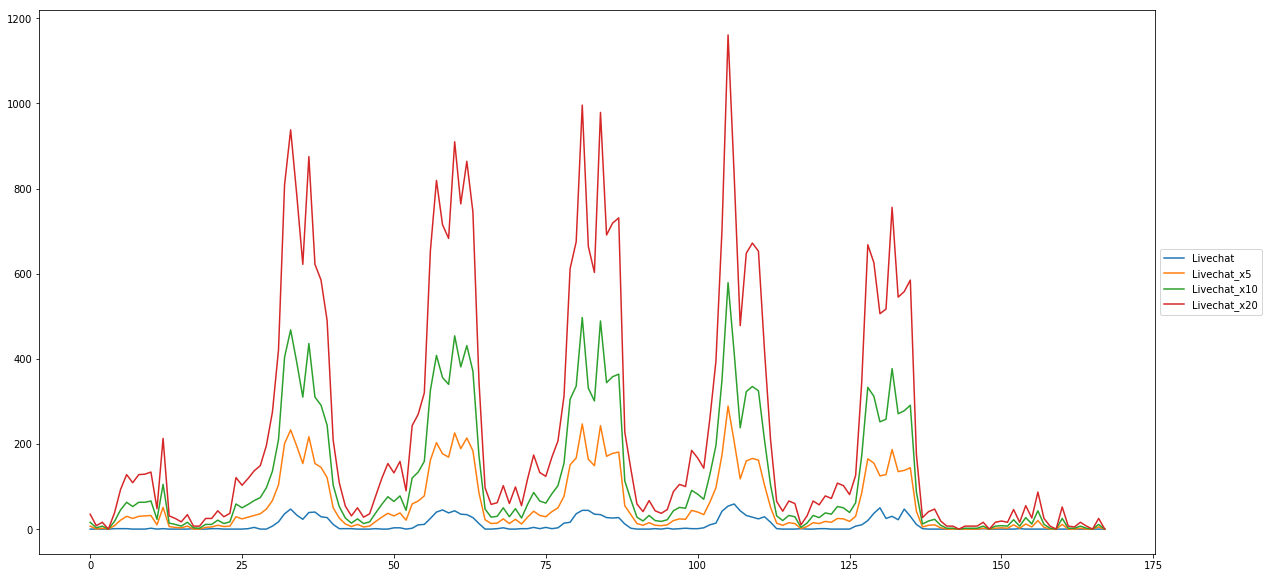

In [99]:
ax = live_chat_counts[["Livechat","Livechat_x5","Livechat_x10","Livechat_x20"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));